<a href="https://colab.research.google.com/github/Jannatu37/machine-learning-/blob/main/Simulation_and_Modeling_Lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Jannatul Ferdoss Faria

ID: 2215151037

University: University Of Information Technology And Science

Section: 7A2

Department: CSE

Course Title: Simulation and Modeling Lab

Course Code: CSE 413



Situation 2 (Note: This is a Monte Carlo simulation problem.)

LatinOrg Inc. sells an organic product made in Costa Rica. Because the time it takes to receive and order the products, LatinOrg places an order every two weeks. The number of products ordered is the difference between the actual on-hand inventory at the end of the week that the order is made and 100, the maximum allowed amount. It cost 50 to place and received an order, 4 each product, and 1/week to keep the product in the store. The product sells for 12. The historical information of on-hand inventory at the time an order is made is as showed.

On-hand inventory

15

25

35

40

42

55


Probability

.12

.25

.20

.06

.02

a) Simulating 60 weeks, what is the estimated average order size (show your data or calculations)?

b) Based on the simulation, what is the average total cost of "having" the product?
Single Server Queueing:
1. Perform a simulation for 200 customers with 2-3 and u=4. Calculate and compare the waiting time and server utilization.
2. Simulate a system with 2-8 and u=6. Discuss the impact of server overload on system performance.
3. Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.

In [4]:
#Simulating 60 weeks, what is the estimated average order size (show your data or calculations)?

import random
import pandas as pd

# Given inventory probability distribution
inventory_dist = {
    'On-hand inventory': [15, 25, 35, 40, 42, 55],
    'Probability': [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]
}

# Create cumulative probability ranges
df = pd.DataFrame(inventory_dist)
df['Cumulative'] = df['Probability'].cumsum()
df['Range'] = pd.cut(df['Cumulative'], bins=[0, 0.12, 0.37, 0.72, 0.92, 0.98, 1.0],
                     labels=['00-11', '12-36', '37-71', '72-91', '92-97', '98-99'])

# Simulate 30 orders (60 weeks / 2 weeks per order)
order_sizes = []
for _ in range(30):
    rand_num = random.randint(0, 99)
    for i, row in df.iterrows():
        if rand_num <= int(row['Range'].split('-')[1]):
            order_size = 100 - row['On-hand inventory']
            order_sizes.append(order_size)
            break

# Calculate average order size
average_order_size = sum(order_sizes) / len(order_sizes)
print(f"Estimated average order size: {average_order_size:.2f}")


Estimated average order size: 67.63


In [6]:
#Based on the simulation, what is the average total cost of "having" the product
# Cost parameters
ordering_cost = 50  # $ per order
product_cost = 4    # $ per product
holding_cost = 1    # $ per week per product
selling_price = 12  # $ per product

# Assume demand between orders is 30 units (as given in example)
demand_between_orders = 30

# Initialize variables
total_ordering_cost = 0
total_product_cost = 0
total_holding_cost = 0

# Calculate costs for each order
for order_size in order_sizes:
    total_ordering_cost += ordering_cost
    total_product_cost += product_cost * order_size

    # Calculate average inventory and holding cost (simplified)
    avg_inventory = (order_size + (100 - order_size)) / 2  # Simplified calculation
    total_holding_cost += holding_cost * avg_inventory * 2  # 2 weeks

# Calculate total and average weekly cost
total_cost = total_ordering_cost + total_product_cost + total_holding_cost
average_weekly_cost = total_cost / 60  # 60 weeks

print(f"Average total weekly cost: ${average_weekly_cost:.2f}")


Average total weekly cost: $210.27


Server Utilization: 69.47%
Average Waiting Time: 0.69 hours
Average Queue Length: 0.71 customers


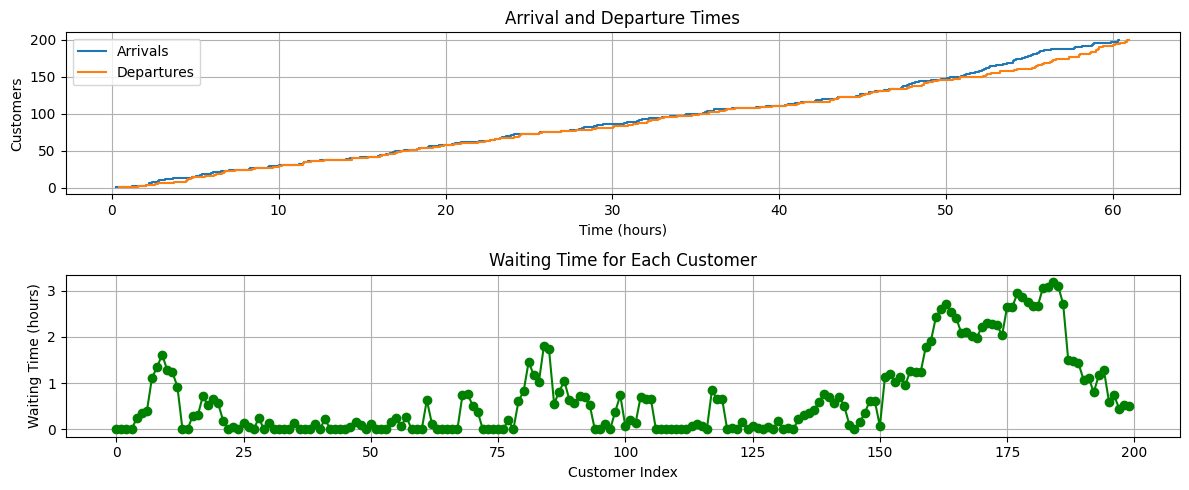

In [7]:
#Single Server Queueing

#Perform a simulation for 200 customers with Y=3 and u=4. Calculate and compare the waiting time and server utilization.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 3  # arrival rate (customers/hour)
mu_rate = 4      # service rate (customers/hour)
n_customers = 200

# Generate inter-arrival and service times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)

# Calculate arrival times
arrival_times = np.cumsum(inter_arrival_times)

# Initialize variables
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)

# First customer starts immediately
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

# Simulate queue for remaining customers
for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

# Calculate metrics
waiting_times = start_times - arrival_times
total_times = end_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

# Print results
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} hours")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot arrival and departure times
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time (hours)')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Arrival and Departure Times')

# Plot waiting times
plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time (hours)')
plt.grid(True)
plt.title('Waiting Time for Each Customer')
plt.tight_layout()
plt.show()


In [9]:
#Simulate a system with y=8 and u=6. Discuss the impact of server overload on system performance.

# Parameters for overloaded system
lambda_rate = 8  # arrival rate (customers/hour)
mu_rate = 6      # service rate (customers/hour)
n_customers = 200




In [10]:
#Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.

import numpy as np

# Parameters
lambda_rate = 5  # arrival rate
mu_rate = 8      # service rate
n_customers = 100
max_queue = 10   # maximum queue capacity

# Initialize variables
np.random.seed(0)  # for reproducibility
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
waiting_times = np.zeros(n_customers)
queue_lengths = np.zeros(n_customers)
lost_customers = 0

# First customer
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]
waiting_times[0] = 0
queue_lengths[0] = 0

for i in range(1, n_customers):
    # Find how many customers are still in the system when customer i arrives
    customers_in_system = np.sum(end_times[:i] > arrival_times[i])

    # Check if queue is full (customers in system >= server + queue capacity)
    if customers_in_system >= max_queue + 1:  # +1 for the server
        # Customer leaves without service
        lost_customers += 1
        start_times[i] = -1  # Mark as lost
        end_times[i] = -1
        waiting_times[i] = -1
        queue_lengths[i] = max_queue
    else:
        # Customer gets served
        start_times[i] = max(arrival_times[i], end_times[i-1])
        end_times[i] = start_times[i] + service_times[i]
        waiting_times[i] = start_times[i] - arrival_times[i]
        queue_lengths[i] = max(0, customers_in_system - 1)  # -1 for the customer being served

# Calculate metrics (excluding lost customers)
valid_customers = (waiting_times != -1)
if np.sum(valid_customers) > 0:
    total_service_time = np.sum(service_times[valid_customers])
    last_valid_end = np.max(end_times[valid_customers])
    server_utilization = total_service_time / last_valid_end
    avg_waiting_time = np.mean(waiting_times[valid_customers])
    avg_queue_length = np.mean(queue_lengths[valid_customers])
else:
    server_utilization = 0
    avg_waiting_time = 0
    avg_queue_length = 0

print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} hours")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")
print(f"Number of Lost Customers: {lost_customers}")

Server Utilization: 71.08%
Average Waiting Time: 0.28 hours
Average Queue Length: 1.64 customers
Number of Lost Customers: 0
